# Exact solution for transverse Ising model


## Jordan-Wigner Transformation
This transformation maps the spin raising and lowering operators into fermion creation and annihilation operators. For detail, raising and lowering operators $S^{\pm}$ work as

\begin{align}
    S^+|\downarrow\rangle = |\uparrow\rangle \quad , \quad S^-|\uparrow\rangle = |\downarrow\rangle
\end{align}

and the creation and annihilation operators $c^{\pm}$ work as

\begin{align}
    c^+|0\rangle = |1\rangle \quad , \quad c^-|1\rangle = |0\rangle
\end{align}

the state $|0\rangle$ means there is no fermion, and state $|1\rangle$ means there is a fermion. Now, let us see some property of raising and lowering operators, first the operators look like (here we let $\hbar$ = 1)

\begin{align}
    S^+ = S^x + iS^y = \frac{\sigma^{x}+i\sigma^{y}}{2} = \left(\begin{array}{cc}
                                0 & 1 \\
                                0 & 0
                                \end{array}\right) \quad , \quad
    S^- = S^x - iS^y = \frac{\sigma^{x}-i\sigma^{y}}{2} = \left(\begin{array}{cc}
                                0 & 0 \\
                                1 & 0
                                \end{array}\right)
\end{align}

and the relation between $S^{\pm}$ is

\begin{align}
    \left[ S^{\pm}, S^{\pm} \right] = 0 \quad , \quad \{S^-, S^+\} = 1
\end{align}

The whole story about Jordan-Wigner transformation is to find the relations about

\begin{align}
    S^+\rightarrow c^+_j = c_j^{\dagger} \quad , \quad S^-\rightarrow c^-_j = c_j
\end{align}

After the transformation, we require that $c_{j}$ should obey the following rules. $|\Omega_c\rangle$ is the vacuum state which looks like $|00\cdots 00\rangle$.

\begin{align}
    \{ c_{i}, c_{j} \} = 0 \quad , \quad \{ c_{i}, c_{j}^{\dagger}\} = \delta_{ij} \quad , \quad c_{i}|\Omega_c\rangle = 0
\end{align}

Notice that $S^{\pm}$ are local operators but $c_j$, $c_j^{\dagger}$ are global operators, the antisymmetry property $\{ c_{i}, c_{j} \} = 0$ is the most import difference between $S^{\pm}$ and $c_j$, $c_j^{\dagger}$. In order to satisfy this condition, the transformation is

\begin{align}
    c_{j} = \left(\bigotimes_{l<j}\sigma^{z}_{l}\right)\otimes S^-_j\otimes \left(\bigotimes_{j<l}\mathbb{I}_{l}\right), \qquad c_{j}^{\dagger} = \left(\bigotimes_{l<j}\sigma^{z}_{l}\right)\otimes S^+_j\otimes \left(\bigotimes_{j<l}\mathbb{I}_{l}\right)
\end{align}

Let's see a concrete example that show how the transformation makes $\{ S^{\pm}, S^{\pm}\} \neq 0$ into $\{ c_{i}, c_{j} \} = 0$. Suppose a system only with three fermions which denote as 1, 2, 3, then we can write

\begin{align}
    c_2 = \sigma^{z}_1\otimes S^-_2 \otimes \mathbb{I}_{3}
    \quad , \quad
    c_3 = \sigma^{z}_1\otimes \sigma^{z}_2 \otimes S^-_3
\end{align}

then the $\{ c_{2}, c_{3} \}$ is

\begin{align}
    \{ c_{2}, c_{3} \} = c_{2}c_{3} + c_{3}c_{2}
    &= \mathbb{I}_{1} \otimes S^-_2\sigma^{z}_2 \otimes S^-_3 + \mathbb{I}_{1} \otimes \sigma^{z}_2 S^-_2 \otimes S^-_3 \\
    &= \mathbb{I}_{1} \otimes (S^-_2\sigma^{z}_2 + \sigma^{z}_2 S^-_2) \otimes S^-_3 \\
    & = \mathbb{I}_{1} \otimes 0 \otimes S^-_3 = 0
\end{align}

In [14]:
import matplotlib.pyplot as plt
from src import *
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.tools.visualization import array_to_latex

Fermionic SWAP gate (fSWAP) looks like

In [ ]:
qc = QuantumCircuit(2)
fSWAP(qc, 0, 1)
array_to_latex(Operator(qc))

## Fourier Transform

In [ ]:
qc = QuantumCircuit(2)
F0(qc, 0, 1)
array_to_latex(Operator(qc))

In [ ]:
qc = QuantumCircuit(2)
F1(qc, 0, 1)
array_to_latex(Operator(qc))

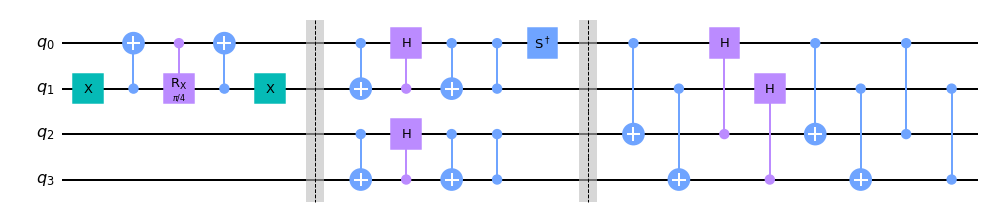

In [15]:
from qiskit import QuantumRegister, QuantumCircuit
q = QuantumRegister(4, "q")
qc = QuantumCircuit(4)
Udisg(qc,1,q[0],q[1],q[2],q[3])
qc.draw("mpl")

In [6]:
from qiskit import Aer, execute, ClassicalRegister, QuantumRegister

In [ ]:
q = QuantumRegister(4, "q")
c = ClassicalRegister(4, "c")
Udis = QuantumCircuit(q, c)
# Udis.draw("mpl")
# plt.show()
ini = QuantumCircuit(q, c)
mes = QuantumCircuit(q, c)
Isex = QuantumCircuit(q, c)
lam = 0.25
Ising(Isex,ini, Udis ,mes,lam,q[0],q[1],q[2],q[3],c[0],c[1],c[2],c[3])
Isex.draw("mpl")

In [ ]:
# use local simulator
shots = 1024
backend = Aer.get_backend('qasm_simulator')
mag_sim = []
for i in range(8):
    q = QuantumRegister(4, "q")
    c = ClassicalRegister(4, "c")
    Udis = QuantumCircuit(q, c)
    # Udis.draw("mpl")
    # plt.show()
    ini = QuantumCircuit(q, c)
    mes = QuantumCircuit(q, c)
    Isex = QuantumCircuit(q, c)
    # Isex.draw("mpl")
    # plt.show()

    lam = i*0.25
    Ising(Isex,ini, Udis ,mes,lam,q[0],q[1],q[2],q[3],c[0],c[1],c[2],c[3])
    # ini.draw("mpl")
    # plt.show()
    # Udis.draw("mpl")
    # plt.show()
    # mes.draw("mpl")
    # plt.show()
    if i == 0:
        Isex.draw("mpl")
        plt.savefig("./quantum_circuit_for_1D_4_spin_ising_model.png")
        plt.show()
        plt.clf()
        # plt.show()

    job = execute(Isex, backend, shots=shots)
    result = job.result()
    counts = result.get_counts()

    r1 = list(counts.keys())
    r2 = list(counts.values())
    M=0
    for j in range(0,len(r1)):
        M=M+(4-2*digit_sum(r1[j]))*r2[j]/shots
    print("$\lambda$: ",lam,", $<\sigma_{z}>$: ",M/4)
    mag_sim.append(M/4)

vexact = np.vectorize(exact)
plot_Mag_of_ground_state(vexact, mag_sim)

In [ ]:
# use local simulator
shots = 1024
backend = Aer.get_backend('qasm_simulator')
# We compute the time evolution for lambda=0.5,0.9 and 1.8
nlam=3
magt_sim=[[] for _ in range(nlam)]
lam0=[0.5,0.9,1.8]
for j in range(nlam):
    lam=lam0[j]
    for i in range(9):
        q = QuantumRegister(4, "q")
        c = ClassicalRegister(4, "c")
        Udis = QuantumCircuit(q, c)
        # Udis.draw("mpl")
        # plt.show()
        ini = QuantumCircuit(q, c)
        mes = QuantumCircuit(q, c)
        Isex_time = QuantumCircuit(q, c)

        t = i * 0.25

        Ising_time(Isex_time, ini, Udis, mes, lam, t, q[0], q[1], q[2], q[3], c[0], c[1], c[2], c[3])

        job = execute(Isex_time, backend, shots=shots)
        result = job.result()
        counts = result.get_counts()
        r1 = list(counts.keys())
        r2 = list(counts.values())
        M = 0
        for k in range(0, len(r1)):
            M = M + (4 - 2 * digit_sum(r1[k])) * r2[k] / shots
        magt_sim[j].append(M / 4)

vexact_t = np.vectorize(exact_time)
plot_Time_evolution_all_up_state(vexact_t, magt_sim)